In [ ]:
#import packages
import pandas as pd
import numpy as np

#read data to pandas dataframe
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#menentukan varoabel independen 
x = data.drop(["quality"], axis = 1)
y = data["quality"]

In [ ]:
#import package model selection dari SKlearn
from sklearn.model_selection import train_test_split
#membagi data training dan testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 13)

#mengaktivasi pakcage dan syntax
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

In [ ]:
#melakukan klasifikasi KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier (n_neighbors=4)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
# menentukan prediksi
y_pred = knn.predict(x_test)
y_pred

array([6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 5, 5, 5, 6, 7, 6, 6, 7, 5, 6, 5, 6,
       6, 5, 6, 5, 5, 5, 6, 7, 7, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5,
       5, 6, 6, 6, 6, 6, 5, 4, 7, 5, 7, 5, 5, 7, 6, 5, 5, 5, 5, 5, 6, 6,
       6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 7, 7, 6, 5, 6, 5, 7, 6,
       6, 6, 5, 6, 6, 6, 7, 6, 6, 5, 6, 6, 6, 6, 5, 5, 7, 7, 5, 6, 7, 7,
       5, 6, 6, 6, 5, 5, 7, 7, 5, 7, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5,
       6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 5, 6, 7, 5, 6, 4, 6, 5, 5, 6, 5, 5,
       6, 6, 5, 7, 6, 5, 6, 7, 5, 6, 7, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5,
       5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 7, 6, 6, 5, 5, 5, 5, 7, 5, 6, 7,
       5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 5, 6, 7, 5, 6, 5, 5, 7,
       5, 5, 6, 6, 7, 5, 5, 5, 6, 7, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6,
       5, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 5, 7, 6, 5, 6, 5, 6, 5, 6, 7, 5,
       5, 5, 5, 7, 5, 5, 7, 5, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5, 7, 6,
       7, 7, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5,

In [ ]:
# Probabilitas hasil prediksi
knn.predict_proba(x_test)

array([[0.  , 0.  , 0.  , 0.75, 0.25, 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.75, 0.25, 0.  , 0.  ],
       ...,
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.75, 0.25, 0.  ],
       [0.  , 0.25, 0.75, 0.  , 0.  , 0.  ]])

In [ ]:
#melihat keakuratan prediksi dengan data aktual dan menampilkan konfusion matrix hasil prediksi
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))

[[  0   0   1   0   0   0]
 [  0   1   4   3   0   0]
 [  0   0 106  37   3   0]
 [  0   1  48  59  16   0]
 [  0   0   2  18  15   0]
 [  0   0   0   3   3   0]]


In [ ]:
#melihat ketepatan prediksi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.50      0.12      0.20         8
           5       0.66      0.73      0.69       146
           6       0.49      0.48      0.48       124
           7       0.41      0.43      0.42        35
           8       0.00      0.00      0.00         6

    accuracy                           0.57       320
   macro avg       0.34      0.29      0.30       320
weighted avg       0.55      0.57      0.55       320



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#menghitung nilai akurasi
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.565625

Text(0, 0.5, 'Error rata-rata')

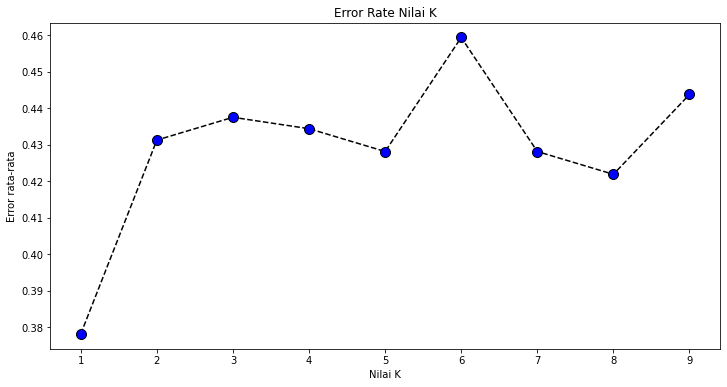

In [ ]:
#nilai K yang menghasilkan keakuratan tinggi dengan grafik plot
import matplotlib.pyplot as plt

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 10):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 10), error, color='black', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate Nilai K')  
plt.xlabel('Nilai K')  
plt.ylabel('Error rata-rata') 